In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Load the file into a DataFrame
df = pd.read_csv('catalog.txt', sep='\t', quotechar='"', encoding="ISO-8859-1", engine='python')

# Display the first few rows
df.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650


In [4]:
df.columns

Index(['AUTHOR', 'BORN-DIED', 'TITLE', 'DATE', 'TECHNIQUE', 'LOCATION', 'URL',
       'FORM', 'TYPE', 'SCHOOL', 'TIMEFRAME'],
      dtype='object')

In [6]:
# Print all unique values in the SCHOOL column
unique_schools = df['SCHOOL'].unique()
unique_schools

array(['German', 'Danish', 'Spanish', 'French', 'Italian', 'Dutch',
       'Scottish', 'Swedish', 'Flemish', 'Netherlandish', 'Swiss',
       'Russian', 'Greek', 'Other', 'American', 'English', 'Austrian',
       'Portuguese', 'Bohemian', 'Catalan', 'Hungarian', 'Irish',
       'Norwegian', 'Polish', 'Belgian', 'Finnish'], dtype=object)

In [11]:
# Step 1: Filter by 'French' school and 'painting' form
df_filtered = df[
    (df['SCHOOL'] != 'Other') &
    (df['FORM'] == 'painting')
].copy()

# Step 2: Create boolean mask for valid DATE
date_mask = []
for date in df_filtered['DATE']:
    if pd.isna(date):
        date_mask.append(False)
    elif re.fullmatch(r'\d{4}', date):  # Single year
        year = int(date)
        date_mask.append(1600 <= year <= 1899)
    elif re.fullmatch(r'(\d{4})-(\d{4})', date):  # Year range
        start, end = map(int, date.split('-'))
        date_mask.append(1600 <= start <= 1899 and end <= 1899 and (end - start <= 10))
    elif re.fullmatch(r'c\.\s*\d{4}', date):  # Circa year
        year = int(re.search(r'\d{4}', date).group())
        date_mask.append(1600 <= year <= 1899)
    else:
        date_mask.append(False)

df_filtered = df_filtered[date_mask]

# Step 3: Create boolean mask for valid URL
url_mask = df_filtered['URL'].str.match(r'^https?://[^\s<>"]+\.[^\s<>"]+$', na=False)

# Final filtered DataFrame
df_filtered = df_filtered[url_mask]

print(f"Original dataset had {len(df)} rows.")
print(f"Filtered dataset has {len(df_filtered)} rows.")
df_filtered.head()

Original dataset had 52867 rows.
Filtered dataset has 10000 rows.


,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
14,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Anna of Tyrol,1604,"Oil on canvas, 58 x 48 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/portrai3.html,painting,portrait,German,1601-1650
21,"AAGAARD, Carl Frederik","(b. 1833, Odense, d. 1895, København)",Deer beside a Lake,1888,"Oil on canvas, 53 x 82 cm",Private collection,https://www.wga.hu/html/a/aagaard/deerlake.html,painting,landscape,Danish,1851-1900
22,"AAGAARD, Carl Frederik","(b. 1833, Odense, d. 1895, København)",The Rose Garden,1877,"Oil on canvas, 98 x 80 cm",Private collection,https://www.wga.hu/html/a/aagaard/rosegard.html,painting,landscape,Danish,1851-1900
48,"ABBATI, Giuseppe","(b. 1836, Napoli, d. 1868, Firenze)",Landscape at Castiglioncello,1863,"Oil on panel, 10 x 30 cm","Galleria dell'Arte Moderna, Palazzo Pitti, Flo...",https://www.wga.hu/html/a/abbati/abbati1.html,painting,landscape,Italian,1851-1900


Paintings count by century:
- 17th (1600-1700) Century: 4771 paintings
- 18th (1701-1800) Century: 2240 paintings
- 19th (1801-1899) Century: 2989 paintings


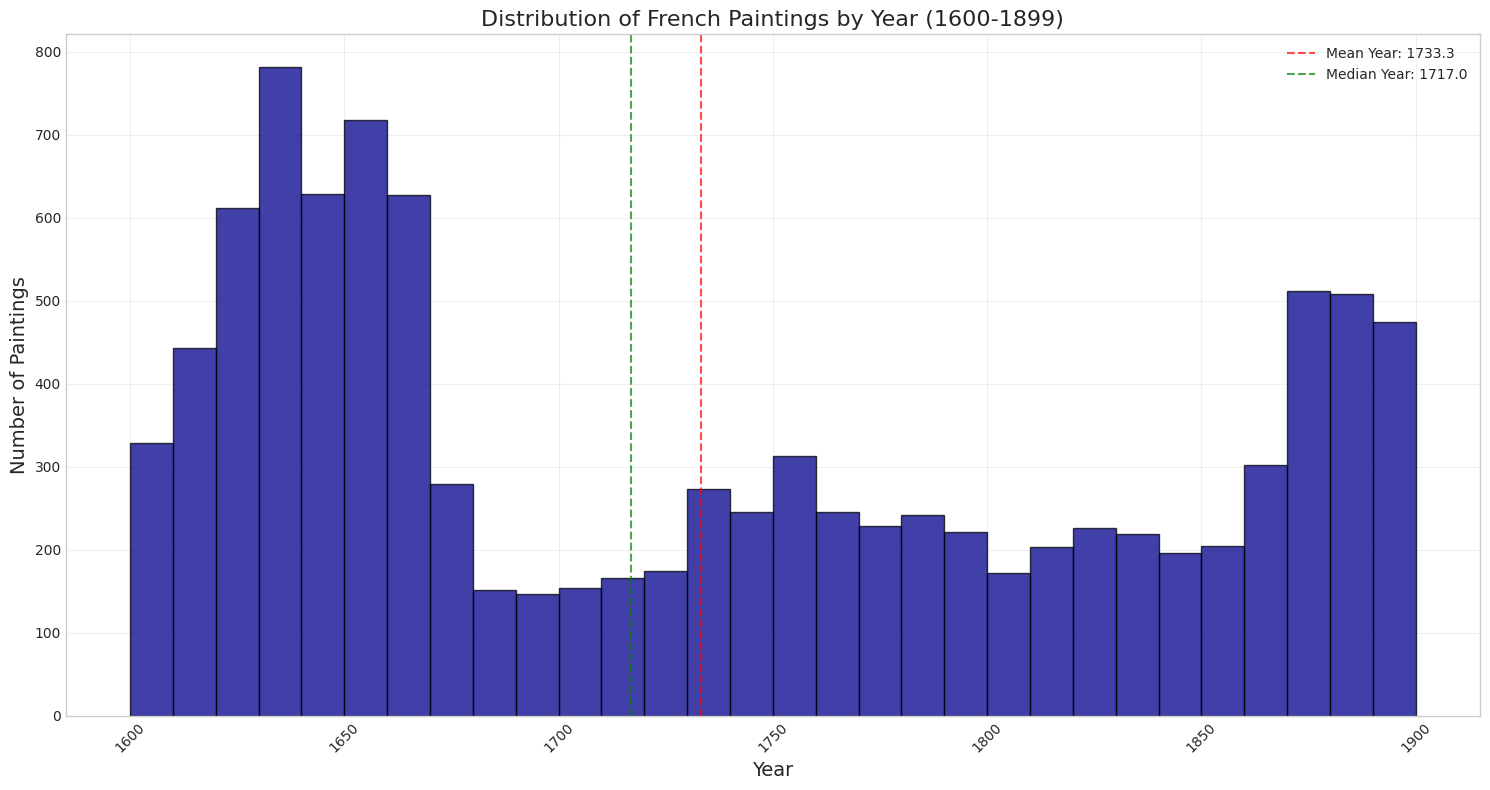

In [ ]:
# Extract years from DATE column
def extract_year(date_str):
    if pd.isna(date_str):
        return None
    # For exact years (e.g., '1800')
    if re.fullmatch(r'\d{4}', date_str):
        return int(date_str)
    # For year ranges (e.g., '1800-1805')
    elif re.fullmatch(r'(\d{4})-(\d{4})', date_str):
        start, end = map(int, date_str.split('-'))
        return (start + end) // 2  # Use midpoint
    # For circa years (e.g., 'c. 1800')
    elif re.fullmatch(r'c\.\s*\d{4}', date_str):
        return int(re.search(r'\d{4}', date_str).group())
    return None

# Extract years and create new column
df_filtered['Year'] = df_filtered['DATE'].apply(extract_year)

# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Create the histogram
plt.figure(figsize=(15, 8))

# Create the histogram with custom bins (10-year intervals)
bins = np.arange(1600, 1901, 10)  # From 1600 to 1900 in steps of 10
plt.hist(df_filtered['Year'], bins=bins, alpha=0.75,
         color='darkblue', edgecolor='black')

# Add a title and labels
plt.title('Distribution of Western Paintings by Year (1600-1899)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Paintings', fontsize=14)

# Add a grid for better readability
plt.grid(True, alpha=0.3)

# Make x-axis labels more readable by rotating them and showing fewer labels
plt.xticks(bins[::5], rotation=45)  # Show every 5th bin label (50-year intervals)

# Add context with text annotations
avg_year = df_filtered['Year'].mean()
median_year = df_filtered['Year'].median()
plt.axvline(x=avg_year, color='red', linestyle='--', alpha=0.7,
            label=f'Mean Year: {avg_year:.1f}')
plt.axvline(x=median_year, color='green', linestyle='--', alpha=0.7,
            label=f'Median Year: {median_year:.1f}')

# Add a legend
plt.legend()

# Improve layout
plt.tight_layout()

# Count paintings per century
centuries = {
    '17th (1600-1700)': ((df_filtered['Year'] >= 1600) &
                         (df_filtered['Year'] <= 1700)).sum(),
    '18th (1701-1800)': ((df_filtered['Year'] >= 1701) &
                         (df_filtered['Year'] <= 1800)).sum(),
    '19th (1801-1899)': ((df_filtered['Year'] >= 1801) &
                         (df_filtered['Year'] <= 1899)).sum()
}

print("Paintings count by century:")
for century, count in centuries.items():
    print(f"- {century} Century: {count} paintings")

# Show the plot
plt.show()

In [ ]:
with open('wga.all', 'w') as file:
    file.write('\n'.join(df_filtered['URL']))
print("URLs have been saved to 'wga.all'.")